# Leaf Disease Detection Project (Wheat Model)

## Importing Required Libraries 

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing import image

In [2]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras import models, layers
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
from keras.callbacks import ModelCheckpoint

## Defining Image Size, Batch Size and Colour Channels

In [3]:
BATCH_SIZE = 32
IMAGE_SIZE = 224
CHANNELS=3

## Mountiing GDrive as the Dataset is uploaded on personal Drive.

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Loading the Dataset

In [5]:
wheat_train_tf = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/drive/MyDrive/LDD/wheat/train",
    seed=123,
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE)

test_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/drive/MyDrive/LDD/wheat/test",
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size =BATCH_SIZE, label_mode = 'int')

val_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/drive/MyDrive/LDD/wheat/val",
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size =BATCH_SIZE, label_mode = 'int')


Found 699 files belonging to 3 classes.
Found 91 files belonging to 3 classes.
Found 86 files belonging to 3 classes.


In [6]:
class_names_wheat = test_dataset.class_names
class_names_wheat

['healthy_wheat', 'leaf_rust', 'stem_rust']

In [ ]:
num_wheat = len(test_dataset.class_names)
num_wheat

3

## Visualizing the Data

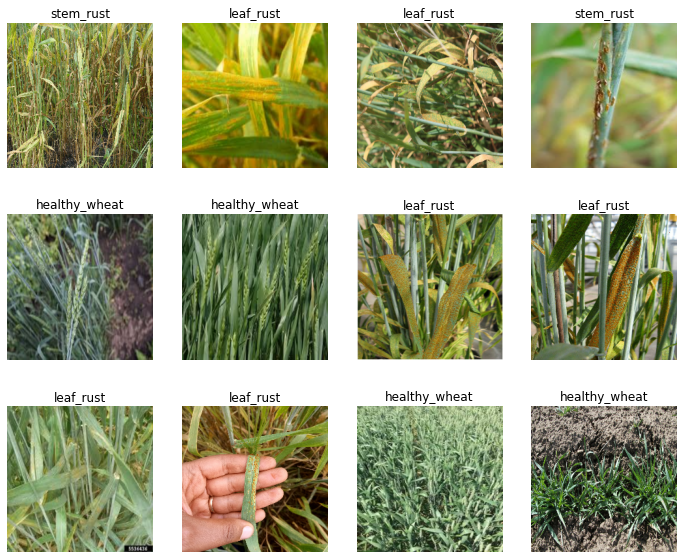

In [ ]:
plt.figure(figsize=(12, 10))
for image_batch, labels_batch in wheat_train_tf.take(1):
    for i in range(12):
        ax = plt.subplot(3, 4, i + 1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names_wheat[labels_batch[i]])
        plt.axis("off")

## Making the path to save model and checkpoints to monitor the val loss of model and saving the best model only.

In [ ]:
model_wheat_path = '/content/drive/MyDrive/LDD/wheat/wheat_model.h5'
checkpoint1 = ModelCheckpoint(model_wheat_path, monitor='val_loss', verbose=1, save_best_only=True, mode='min')
callbacks_list1 = [checkpoint1] 

## Model building

In [ ]:
wheat_model = Sequential([layers.Conv2D(filters=32, kernel_size=(3,3), input_shape = (224,224,3)),
                          layers.MaxPool2D(pool_size=(2,2)),
                          layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
                          layers.MaxPool2D(pool_size=(2,2)),
                          layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
                          layers.MaxPool2D(pool_size=(2,2)),
                          layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
                          layers.MaxPool2D(pool_size=(2,2)),
                          layers.Dropout(0.5),
                          layers.Flatten(),
                          layers.Dense(units=64, activation='relu'),
                          layers.Dropout(0.1),
                          layers.Dense(units=64, activation = 'relu'),
                          layers.Dropout(0.25),
                          layers.Flatten(),
                          layers.Dense(num_wheat, activation='softmax')])
wheat_model.build(input_shape=(32,224,224,3))

## Compiling the model

In [ ]:
# tell the model what cost and optimization method to use
wheat_model.compile(
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
  optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
  metrics=['accuracy'])

## Fitting the model on the data with 50 epochs

In [ ]:
history2 = wheat_model.fit(
  wheat_train_tf,
  validation_data = val_dataset, 
  callbacks=[callbacks_list1],
  epochs=50)

Epoch 1/50
22/22 [==============================] - ETA: 0s - loss: 9.0510 - accuracy: 0.3720
Epoch 1: val_loss improved from inf to 1.22943, saving model to /content/drive/MyDrive/LDD/wheat/wheat_model.h5
22/22 [==============================] - 135s 6s/step - loss: 9.0510 - accuracy: 0.3720 - val_loss: 1.2294 - val_accuracy: 0.3837
Epoch 2/50
21/22 [===========================>..] - ETA: 0s - loss: 2.0498 - accuracy: 0.4256
Epoch 2: val_loss improved from 1.22943 to 1.07364, saving model to /content/drive/MyDrive/LDD/wheat/wheat_model.h5
22/22 [==============================] - 15s 507ms/step - loss: 2.0090 - accuracy: 0.4278 - val_loss: 1.0736 - val_accuracy: 0.4070
Epoch 3/50
21/22 [===========================>..] - ETA: 0s - loss: 1.3238 - accuracy: 0.3884
Epoch 3: val_loss did not improve from 1.07364
22/22 [==============================] - 14s 456ms/step - loss: 1.3105 - accuracy: 0.3948 - val_loss: 1.1016 - val_accuracy: 0.3605
Epoch 4/50
21/22 [===========================>..]

## Again fitting for another 50 epochs

In [ ]:
history = wheat_model.fit(
  wheat_train_tf,
  validation_data = val_dataset, 
  callbacks=[callbacks_list1],
  epochs=50)

Epoch 1/50
21/22 [===========================>..] - ETA: 0s - loss: 0.4903 - accuracy: 0.8036
Epoch 1: val_loss improved from 0.63401 to 0.63278, saving model to /content/drive/MyDrive/LDD/wheat/wheat_model.h5
22/22 [==============================] - 15s 484ms/step - loss: 0.4959 - accuracy: 0.7997 - val_loss: 0.6328 - val_accuracy: 0.7442
Epoch 2/50
21/22 [===========================>..] - ETA: 0s - loss: 0.5315 - accuracy: 0.7827
Epoch 2: val_loss did not improve from 0.63278
22/22 [==============================] - 14s 446ms/step - loss: 0.5291 - accuracy: 0.7825 - val_loss: 0.6484 - val_accuracy: 0.7907
Epoch 3/50
21/22 [===========================>..] - ETA: 0s - loss: 0.4105 - accuracy: 0.8348
Epoch 3: val_loss improved from 0.63278 to 0.60649, saving model to /content/drive/MyDrive/LDD/wheat/wheat_model.h5
22/22 [==============================] - 15s 485ms/step - loss: 0.4174 - accuracy: 0.8326 - val_loss: 0.6065 - val_accuracy: 0.8023
Epoch 4/50
22/22 [=========================

In [ ]:
wheat_model.save_weights(model_wheat_path)

In [ ]:
wheat_model.load_weights(model_wheat_path)


## Evaluating the model on test dataset. Accuracy is great (79.12%)

In [ ]:
scores_wheat2 = wheat_model.evaluate(test_dataset)

3/3 [==============================] - 2s 29ms/step - loss: 0.7658 - accuracy: 0.7912


## Visualizing the model preformance on metrics such as loss and accuracy

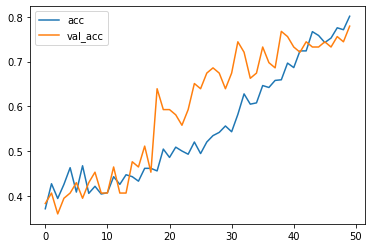

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history2.history['accuracy'], label='acc')
plt.plot(history2.history['val_accuracy'], label='val_acc')
plt.legend()

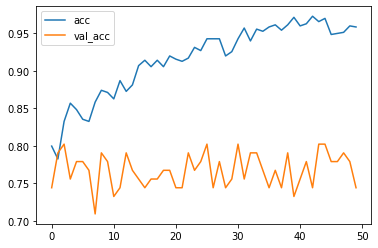

In [ ]:
plt.plot(history.history['accuracy'], label='acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.legend()

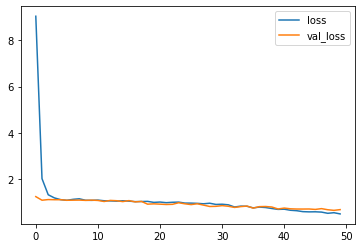

In [ ]:
plt.plot(history2.history['loss'], label='loss')
plt.plot(history2.history['val_loss'], label='val_loss')
plt.legend()

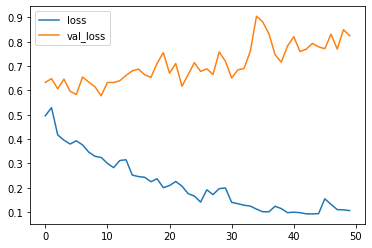

In [ ]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()

## Making a function to Predict the image and give the confidence value

In [ ]:
def predict(wheat_model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = wheat_model.predict(img_array)

    predicted_class = class_names_wheat[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

## Making the Function to see the model performance on images and see the confidence (Almost all are correct as accuracy is high)

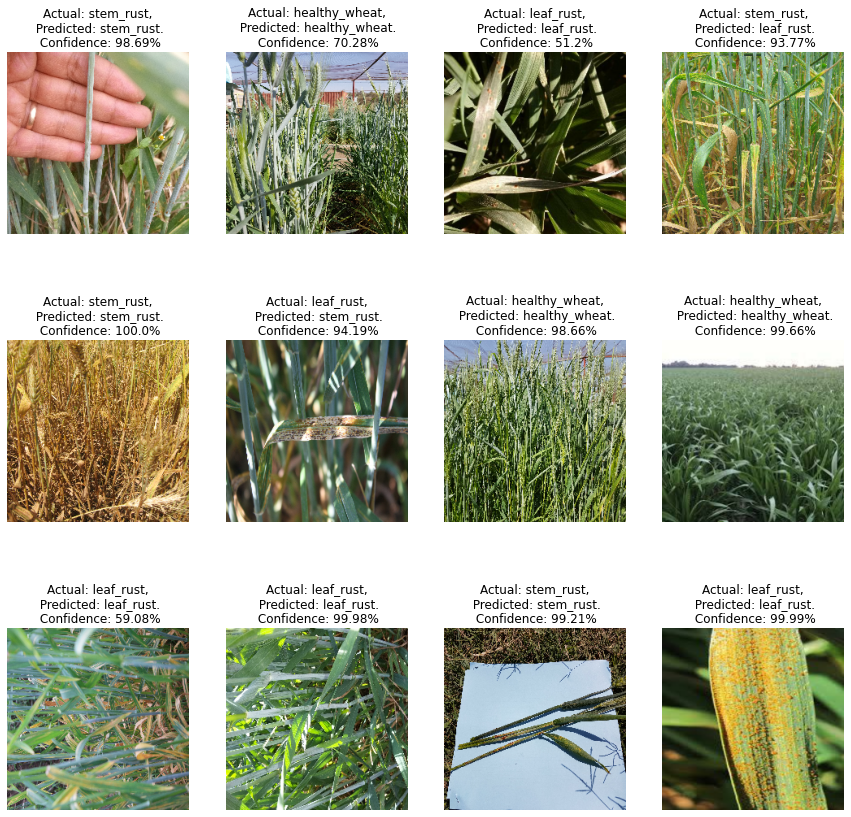

In [ ]:
plt.figure(figsize=(15, 15))
for images, labels in test_dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(wheat_model, images[i].numpy())
        actual_class = class_names_wheat[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")

## Converting the H5 Model to Tflite format

In [ ]:
converter = tf.lite.TFLiteConverter.from_keras_model(wheat_model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
converter.target_spec.supported_types = [tf.float16]
tflite_fp16_model = converter.convert()
with open('/content/wheat_model.tflite', 'wb') as f:
  f.write(tflite_fp16_model)

In [ ]:
test_images = []
test_labels = []
for image, label in test_dataset.take(len(test_dataset)).unbatch():
  test_images.append(image)
  test_labels.append(label)


## Making the function to interpret the tflite model to see it's performance

In [ ]:
def evaluate(interpreter):
  prediction= []
  input_index = interpreter.get_input_details()[0]["index"]
  output_index = interpreter.get_output_details()[0]["index"]
  input_format = interpreter.get_output_details()[0]['dtype']
  
  for i, test_image in enumerate(test_images):
    if i % 100 == 0:
      print('Evaluated on {n} results so far.'.format(n=i))
    test_image = np.expand_dims(test_image, axis=0).astype(input_format)
    interpreter.set_tensor(input_index, test_image)

    # Run inference.
    interpreter.invoke()
    output = interpreter.tensor(output_index)
    predicted_label = np.argmax(output()[0])
    prediction.append(predicted_label)
    
  print('\n')
  # Comparing prediction results with ground truth labels to calculate accuracy.
  prediction = np.array(prediction)
  accuracy = (prediction == test_labels).mean()
  return accuracy


## Predicting the images from test dataset from tflite model and viewing it's accuracy. It is great and Fast (accuracy = 79.12%)

In [ ]:
# Passing the FP-16 TF Lite model to the interpreter.
interpreter = tf.lite.Interpreter('/content/wheat_model.tflite')
# Allocating tensors.
interpreter.allocate_tensors()
# Evaluating the model on the test dataset.
test_accuracy = evaluate(interpreter)
print('Float 16 Quantized TFLite Model Test Accuracy:', test_accuracy*100)
#print('Baseline Keras Model Test Accuracy:', baseline_model_accuracy*100)


Evaluated on 0 results so far.


Float 16 Quantized TFLite Model Test Accuracy: 79.12087912087912


## Again testing the tflite model to see the results in form of a dataframe to see if there is any bias in classes

In [ ]:

tflite_interpreter = tf.lite.Interpreter(model_path='/content/wheat_model.tflite')

input_details = tflite_interpreter.get_input_details()
output_details = tflite_interpreter.get_output_details()

print("== Input details ==")
print("name:", input_details[0]['name'])
print("shape:", input_details[0]['shape'])
print("type:", input_details[0]['dtype'])

print("\n== Output details ==")
print("name:", output_details[0]['name'])
print("shape:", output_details[0]['shape'])
print("type:", output_details[0]['dtype'])

== Input details ==
name: serving_default_conv2d_input:0
shape: [  1 224 224   3]
type: <class 'numpy.float32'>

== Output details ==
name: StatefulPartitionedCall:0
shape: [1 3]
type: <class 'numpy.float32'>


In [ ]:
tflite_interpreter.resize_tensor_input(input_details[0]['index'], (32, 224, 224, 3))
tflite_interpreter.resize_tensor_input(output_details[0]['index'], (32, 5))
tflite_interpreter.allocate_tensors()

input_details = tflite_interpreter.get_input_details()
output_details = tflite_interpreter.get_output_details()

print("== Input details ==")
print("name:", input_details[0]['name'])
print("shape:", input_details[0]['shape'])
print("type:", input_details[0]['dtype'])

print("\n== Output details ==")
print("name:", output_details[0]['name'])
print("shape:", output_details[0]['shape'])
print("type:", output_details[0]['dtype'])

== Input details ==
name: serving_default_conv2d_input:0
shape: [ 32 224 224   3]
type: <class 'numpy.float32'>

== Output details ==
name: StatefulPartitionedCall:0
shape: [32  3]
type: <class 'numpy.float32'>


In [ ]:
test_image_batch, test_label_batch = next(iter(test_dataset))
true_label_ids = np.argmax(test_label_batch, axis=-1)

print("Test batch shape:", test_image_batch.shape)

Test batch shape: (32, 224, 224, 3)


In [ ]:
tflite_interpreter.set_tensor(input_details[0]['index'], test_image_batch)

tflite_interpreter.invoke()

tflite_model_predictions = tflite_interpreter.get_tensor(output_details[0]['index'])
print("Prediction results shape:", tflite_model_predictions.shape)

Prediction results shape: (32, 3)


In [ ]:
tflite_pred_dataframe = pd.DataFrame(np.round_(tflite_model_predictions))
tflite_pred_dataframe.columns = class_names_wheat

print("TFLite prediction results for the first elements")
tflite_pred_dataframe.head(50)

TFLite prediction results for the first elements


,healthy_wheat,leaf_rust,stem_rust
0,0.0,1.0,0.0
1,0.0,0.0,1.0
2,0.0,1.0,0.0
3,0.0,0.0,1.0
4,1.0,0.0,0.0
5,0.0,1.0,0.0
6,0.0,0.0,1.0
7,0.0,1.0,0.0
8,1.0,0.0,0.0
9,0.0,1.0,0.0


## Dataframe shows theree is no Bias in the model and it is working perfectly fine and ready to deploy

In [ ]:
from google.colab import files
files.download('wheat_model.tflite')

print('`model.tflite` has been downloaded')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

`model.tflite` has been downloaded
